In this code we merge the codes we created in the first week, we join the three optimizers we have tested (Adam, sgd and RMSprop) using the starting point code with the data augmentation done on our trein dataset (created in the code named 'fragment_train').

In [1]:
import torch
print(torch.cuda.is_available()) # Ha de ser True

True


### Data Augmentation Flip

In [2]:
%pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 4.3 MB/s eta 0:00:09
   ---------------------------------------- 0.4/38.6 MB 4.6 MB/s eta 0:00:09
    --------------------------------------- 0.7/38.6 MB 4.8 MB/s eta 0:00:08
    --------------------------------------- 0.8/38.6 MB 5.2 MB/s eta 0:00:08
    --------------------------------------- 0.9/38.6 MB 4.4 MB/s eta 0:00:09
   - -------------------------------------- 1.1/38.6 MB 3.8 MB/s eta 0:00:10
   - -------------------------------------- 1.4/38.6 MB 4.1 MB/s eta 0:00:10
   - -------------------------------------- 1.7/38.6 MB 4.6 MB/s eta 0:00:08
   -- ------------------------------------- 2.1/38.6 MB 5.2 MB/s eta 0:00:07
   -- ----------

In [3]:
import cv2
import os

# imatges originals:
input_dir = "/home/xnmaster/Pictures/train_10_artists/train_10_artists"

# where are we saving the images created:
output_dir = "/home/xnmaster/Pictures/train_10_artists_data_augmentation"

# create the folder:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# save all the original images:
image_files = os.listdir(input_dir)

for img_file in image_files:
    img_path = os.path.join(input_dir, img_file)

    # this reads the original image
    img = cv2.imread(img_path)
    # as we had some errors, we need to find out if it loaded correcty
    if img is None:
        print("No carrega correctament", img_path)
        continue

    # horizontal
    flipped_img_h = cv2.flip(img, 1)
    cv2.imwrite(os.path.join(output_dir, f"{img_file.split('.')[0]}_flipped_h.jpg"), flipped_img_h)

    # vertical
    flipped_img_v = cv2.flip(img, 0)
    cv2.imwrite(os.path.join(output_dir, f"{img_file.split('.')[0]}_flipped_v.jpg"), flipped_img_v)

    # horizontal and vertical
    flipped_img_hv = cv2.flip(img, -1)
    cv2.imwrite(os.path.join(output_dir, f"{img_file.split('.')[0]}_flipped_hv.jpg"), flipped_img_hv)

### Data Augmentation Rotation

In [5]:
from PIL import Image
import os

# Original Directory
input_dir = "/home/xnmaster/Pictures/train_10_artists/train_10_artists"

# where are we saving the images created:
output_dir = "/home/xnmaster/Pictures/train_10_artists_data_augmentation"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List of the input files
image_files = os.listdir(input_dir)

for img_file in image_files:
    img_path = os.path.join(input_dir, img_file)
    
    try:img = Image.open(img_path)
    except IOError:
        print("Impossible to read the message:", img_path)
        continue

    # Rotation of 45 degrees
    rotation_angle = 90
    rotated_img = img.rotate(rotation_angle, expand=True)

    # Saving of the output
    output_file = f"{img_file.split('.')[0]}_rotated_{rotation_angle}.jpg"
    output_path = os.path.join(output_dir, output_file)
    rotated_img.save(output_path)
  
    # Rotation of 90 degrees
    rotation_angle_90 = 90
    rotated_img_90 = img.rotate(rotation_angle_90, expand=True)

    # Saving of the output
    output_file_90 = f"{img_file.split('.')[0]}_rotated_{rotation_angle_90}.jpg"
    output_path_90 = os.path.join(output_dir, output_file_90)
    rotated_img_90.save(output_path_90)
    
    # Additional rotation of 180 degrees
    rotation_angle_180 = 180
    rotated_img_180 = img.rotate(rotation_angle_180, expand=True)

    # Saving of the output
    output_file_180 = f"{img_file.split('.')[0]}_rotated_{rotation_angle_180}.jpg"
    output_path_180 = os.path.join(output_dir, output_file_180)
    rotated_img_180.save(output_path_90)
    
    

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# %matplotlib inline
import matplotlib.pyplot as plt
from random import seed # for setting seed
import tensorflow
from IPython import sys_info

import gc # garbage collection

In [3]:
# globals

DATA_DIR = '/home/xnmaster/Pictures'
TRAIN_1_DIR = '/home/xnmaster/Pictures/train_10_artists_data_augmentation'

TRAIN_DIRS = [TRAIN_1_DIR]

# TEST_DIR = r"/Users/jesus/Desktop/Projecte/test" 
TEST_DIR = "/home/xnmaster/Pictures/test"

In [4]:
# Get the list of files in the folder
files_in_folder = os.listdir(TRAIN_1_DIR)

# Count the number of files in the folder
num_files_in_folder = len(files_in_folder)

print("Number of files in the folder TRAIN_1_DIR:", num_files_in_folder)


files_in_folder = os.listdir(TEST_DIR)

# Count the number of files in the folder
num_files_in_folder = len(files_in_folder)

print("Number of files in the folder TEST_DIR:", num_files_in_folder)


Number of files in the folder TRAIN_1_DIR: 10400
Number of files in the folder TEST_DIR: 10116


In [31]:
MY_SEED = 42 # 480 could work too
seed(MY_SEED)
np.random.seed(MY_SEED)
tensorflow.random.set_seed(MY_SEED)

print(sys_info())
# get module information
# %pip freeze > frozen-requirements.txt
# append system information to file
# with open("frozen-requirements.txt", "a") as file:
#     file.write(sys_info())

{'commit_hash': '37242ba43',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/anaconda/envs/azureml_py38_PT_and_TF/lib/python3.8/site-packages/IPython',
 'ipython_version': '8.12.0',
 'os_name': 'posix',
 'platform': 'Linux-5.15.0-1064-azure-x86_64-with-glibc2.10',
 'sys_executable': '/anaconda/envs/azureml_py38_PT_and_TF/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'}


In [ ]:
%pip install -r "C:\Users\jesus\Desktop\Projecte\XNAPproject-grup07\our_code\frozen-requirements.txt" 

#"C:\Users\Mercè\Documents\UAB\XN\Projecte\XNAPproject-grup07\our_code\frozen-requirements.txt"

In [8]:
# %pip install tensorflow[and-cuda]

In [ ]:
%pip install torchvision 

In [32]:
from tensorflow.python.client import device_lib
# print out the CPUs and GPUs
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 530030903307538630
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 355139584
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17242754982957347838
physical_device_desc: "device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0"
xla_global_id: 416903419
]


In [8]:
# https://stackoverflow.com/questions/25705773/image-cropping-tool-python
# because painting images are hella big
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

In [22]:
# %pip install Pillow --upgrade

Execute in local and virtual
(no cal cada vegada, només una vegada pq elimina les fotos que no són vàlides)

In [5]:
from PIL import Image
import os

# Function to check if a file is an image
def is_image(file_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    return any(file_path.lower().endswith(ext) for ext in image_extensions)

# Function to check if an image file is valid
def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except Exception as e:
        print(f"Invalid image: {file_path} - {e}")
        # Remove the file if it's invalid
        os.remove(file_path)
        print(f"Removed file: {file_path}")
        return False

# Validate images in a directory
def validate_images(directory):
    print(f"Validating images in directory: {directory}")
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path) and is_image(file_path):
            if is_valid_image(file_path):
                print(f"Valid image: {file_path}")

# Validate training and testing directories
def validate_directories(*directories):
    for directory in directories:
        if not os.path.exists(directory):
            raise ValueError(f"Directory does not exist: {directory}")
        if not os.path.isdir(directory):
            raise ValueError(f"Not a directory: {directory}")

# Validate training and testing directories
validate_directories(DATA_DIR, TEST_DIR)
for train_dir in TRAIN_DIRS:
    validate_directories(train_dir)

# Validate images in training and testing directories
validate_images(DATA_DIR)
validate_images(TEST_DIR)
for train_dir in TRAIN_DIRS:
    validate_images(train_dir)


Validating images in directory: /home/xnmaster/Pictures
Validating images in directory: /home/xnmaster/Pictures/test
Valid image: /home/xnmaster/Pictures/test/24002.jpg
Valid image: /home/xnmaster/Pictures/test/17389.jpg
Valid image: /home/xnmaster/Pictures/test/89676.jpg
Valid image: /home/xnmaster/Pictures/test/66466.jpg
Valid image: /home/xnmaster/Pictures/test/1174.jpg
Valid image: /home/xnmaster/Pictures/test/56947.jpg
Valid image: /home/xnmaster/Pictures/test/49512.jpg
Valid image: /home/xnmaster/Pictures/test/64880.jpg
Valid image: /home/xnmaster/Pictures/test/1206.jpg
Valid image: /home/xnmaster/Pictures/test/60288.jpg
Valid image: /home/xnmaster/Pictures/test/29973.jpg
Valid image: /home/xnmaster/Pictures/test/22060.jpg
Valid image: /home/xnmaster/Pictures/test/11795.jpg
Valid image: /home/xnmaster/Pictures/test/57243.jpg
Valid image: /home/xnmaster/Pictures/test/20220.jpg
Valid image: /home/xnmaster/Pictures/test/62874.jpg
Valid image: /home/xnmaster/Pictures/test/33899.jpg
V

Valid image: /home/xnmaster/Pictures/test/76708.jpg
Valid image: /home/xnmaster/Pictures/test/49778.jpg
Valid image: /home/xnmaster/Pictures/test/101675.jpg
Valid image: /home/xnmaster/Pictures/test/6087.jpg
Valid image: /home/xnmaster/Pictures/test/83729.jpg
Valid image: /home/xnmaster/Pictures/test/34314.jpg
Valid image: /home/xnmaster/Pictures/test/14583.jpg
Valid image: /home/xnmaster/Pictures/test/96554.jpg
Valid image: /home/xnmaster/Pictures/test/3503.jpg
Valid image: /home/xnmaster/Pictures/test/74119.jpg
Valid image: /home/xnmaster/Pictures/test/72213.jpg
Valid image: /home/xnmaster/Pictures/test/26789.jpg
Valid image: /home/xnmaster/Pictures/test/64310.jpg
Valid image: /home/xnmaster/Pictures/test/58408.jpg
Valid image: /home/xnmaster/Pictures/test/100472.jpg
Valid image: /home/xnmaster/Pictures/test/53058.jpg
Valid image: /home/xnmaster/Pictures/test/44781.jpg
Valid image: /home/xnmaster/Pictures/test/35785.jpg
Valid image: /home/xnmaster/Pictures/test/100341.jpg
Valid image

/anaconda/envs/azureml_py38_PT_and_TF/lib/python3.8/site-packages/PIL/Image.py:3035: DecompressionBombWarning: Image size (133026477 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Valid image: /home/xnmaster/Pictures/test/101536.jpg
Valid image: /home/xnmaster/Pictures/test/39917.jpg
Valid image: /home/xnmaster/Pictures/test/53877.jpg
Valid image: /home/xnmaster/Pictures/test/17572.jpg
Valid image: /home/xnmaster/Pictures/test/13183.jpg
Valid image: /home/xnmaster/Pictures/test/16793.jpg
Valid image: /home/xnmaster/Pictures/test/87610.jpg
Valid image: /home/xnmaster/Pictures/test/19335.jpg
Valid image: /home/xnmaster/Pictures/test/79659.jpg
Valid image: /home/xnmaster/Pictures/test/41222.jpg
Valid image: /home/xnmaster/Pictures/test/68752.jpg
Valid image: /home/xnmaster/Pictures/test/50360.jpg
Valid image: /home/xnmaster/Pictures/test/95902.jpg
Valid image: /home/xnmaster/Pictures/test/14398.jpg
Valid image: /home/xnmaster/Pictures/test/52029.jpg
Valid image: /home/xnmaster/Pictures/test/97029.jpg
Valid image: /home/xnmaster/Pictures/test/101224.jpg
Valid image: /home/xnmaster/Pictures/test/87627.jpg
Valid image: /home/xnmaster/Pictures/test/81230.jpg
Valid imag

In [6]:
# Get the list of files in the folder
files_in_folder = os.listdir(TRAIN_1_DIR)

# Count the number of files in the folder
num_files_in_folder = len(files_in_folder)

print("Number of files in the folder TRAIN_1_DIR:", num_files_in_folder)


files_in_folder = os.listdir(TEST_DIR)

# Count the number of files in the folder
num_files_in_folder = len(files_in_folder)

print("Number of files in the folder TEST_DIR:", num_files_in_folder)


Number of files in the folder TRAIN_1_DIR: 10400
Number of files in the folder TEST_DIR: 10116


In [7]:
# df = pd.read_csv(DATA_DIR + 'all_data_info.csv/all_data_info.csv') 
df = pd.read_csv('/home/xnmaster/Pictures/all_data_info.csv') # r'\train_info\train_info.csv'
print("df.shape", df.shape)

df.shape (103250, 12)


In [8]:
df.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [9]:
# quick fix for corrupted files
list_of_corrupted = ['3917.jpg','18649.jpg','20153.jpg','41945.jpg',
'79499.jpg','91033.jpg','92899.jpg','95347.jpg',
'100532.jpg','101947.jpg']
# display the corrupted rows of dataset for context
corrupt_df = df[df["new_filename"].isin(list_of_corrupted) == True]
print(corrupt_df.head(len(list_of_corrupted)))

# completely get rid of them
df = df[df["new_filename"].isin(list_of_corrupted) == False]

# try to see if they are still there
print(df[df["new_filename"].isin(list_of_corrupted) == True])

print("df.shape", df.shape)

                             artist    date              genre  pixelsx   
185                  Giorgio Vasari    1534           portrait   3512.0  \
731                       Juan Gris    1918          cityscape   2844.0   
994                       Juan Gris    1917         still life   3918.0   
1084   John Roddam Spencer Stanhope    1860     genre painting   4249.0   
1105                 Henri Rousseau    1908          cityscape   3403.0   
9984   John Roddam Spencer Stanhope     NaN  symbolic painting   1309.0   
19876              Georgia O'Keeffe  1915.0           abstract   1400.0   
28748                    Franz Marc    1913    animal painting    951.0   
46256           Esaias van de Velde    1622          landscape    942.0   
98236                 George Inness     NaN  literary painting    376.0   

       pixelsy  size_bytes     source                         style   
185     4850.0  10360549.0    wikiart  Mannerism (Late Renaissance)  \
731     3882.0   5393504.0    wi

In [10]:
# Get the list of files in the folder
files_in_folder = os.listdir(TRAIN_1_DIR)

# Count the number of files in the folder
num_files_in_folder = len(files_in_folder)

print("Number of files in the folder TRAIN_1_DIR:", num_files_in_folder)


files_in_folder = os.listdir(TEST_DIR)

# Count the number of files in the folder
num_files_in_folder = len(files_in_folder)

print("Number of files in the folder TEST_DIR:", num_files_in_folder)


Number of files in the folder TRAIN_1_DIR: 10400
Number of files in the folder TEST_DIR: 10116


Artists

In [11]:
train_df = df[df["in_train"] == True]
test_df = df[df['in_train'] == False]
train_df = df[['artist', 'new_filename']]
test_df = test_df[['artist', 'new_filename']]

print("test_df.shape", test_df.shape)
print("train_df.shape", train_df.shape)

# artists = {} # holds artist hash & the count
# for a in filtered_df['artist']:
#     if (a not in artists):
#         artists[a] = 1
#     else:
#         artists[a] += 1

# training_set_artists = []
# for a,count in artists.items():
#     if(int(count) >= 200): # it takes no more than 200 artists
#         training_set_artists.append(a)

# print("number of artists",len(training_set_artists))

# print("\nlist of artists...\n", training_set_artists)


test_df.shape (23814, 2)
train_df.shape (103240, 2)


In [12]:
artists = {'Ivan Aivazovsky': 500,
 'John Singer Sargent': 500,
 'Pierre-Auguste Renoir': 500,
 'Marc Chagall': 500,
 'Pablo Picasso': 500,
 'Zdislav Beksinski': 500,
 'Ivan Shishkin': 500,
 'Gustave Dore': 500,
 'Ilya Repin': 500,
 'Giovanni Battista Piranesi': 500}

training_set_artists = ['Ivan Aivazovsky',
 'John Singer Sargent',
 'Pierre-Auguste Renoir',
 'Marc Chagall',
 'Pablo Picasso',
 'Zdislav Beksinski',
 'Ivan Shishkin',
 'Gustave Dore',
 'Ilya Repin',
 'Giovanni Battista Piranesi']

In [13]:
t_df = train_df[train_df["artist"].isin(training_set_artists)]

t_df.head(5)

,artist,new_filename
14,Ivan Aivazovsky,99442.jpg
28,Gustave Dore,7486.jpg
29,Gustave Dore,35766.jpg
34,Gustave Dore,31977.jpg
82,Ivan Aivazovsky,81750.jpg


In [14]:
t1_df = t_df[t_df['new_filename'].str.startswith('1')]

t2_df = t_df[t_df['new_filename'].str.startswith('2')]

t3_df = t_df[t_df['new_filename'].str.startswith('3')]

t4_df = t_df[t_df['new_filename'].str.startswith('4')]

t5_df = t_df[t_df['new_filename'].str.startswith('5')]

t6_df = t_df[t_df['new_filename'].str.startswith('6')]

t7_df = t_df[t_df['new_filename'].str.startswith('7')]

t8_df = t_df[t_df['new_filename'].str.startswith('8')]

t9_df = t_df[t_df['new_filename'].str.startswith('9')]

all_train_dfs = [t1_df, t2_df, t3_df,
                t4_df, t5_df, t6_df,
                t7_df, t8_df, t9_df]

t9_df.head(5)

,artist,new_filename
14,Ivan Aivazovsky,99442.jpg
591,Giovanni Battista Piranesi,96147.jpg
634,Giovanni Battista Piranesi,94943.jpg
681,Giovanni Battista Piranesi,97939.jpg
748,Giovanni Battista Piranesi,98150.jpg


In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# specify the model that classifies 38 artists 🎨 🖌

## wandb
Execute following lines if we use wandb

In [17]:
%pip install wandb -qU

Note: you may need to restart the kernel to use updated packages.


In [18]:
import wandb
from wandb.integration.keras import WandbCallback, WandbMetricsLogger, WandbModelCheckpoint
wandb.login()
# 0927244f833ccea1b247099feaaaf54084a5c30c

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: ERROR API key must be 40 characters long, yours was 9
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: ERROR API key must be 40 characters long, yours was 15
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an 

True

## without wandb

In [16]:
len(training_set_artists)

10

In [17]:
num_classes = len(training_set_artists) # one class per artist
# weights_notop_path = r"C:\Users\Mercè\Documents\UAB\XN\Projecte\resnet50\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
model_adam = Sequential()

model_adam.add(ResNet50(
  include_top=False,
  weights='imagenet',
  pooling='avg'
))
model_adam.add(Dense(
  num_classes,
  activation='softmax'
))

model_adam.layers[0].trainable = False

In [18]:
model_sgd = Sequential()

model_sgd.add(ResNet50(
  include_top=False,
  weights='imagenet',
  pooling='avg'
))
model_sgd.add(Dense(
  num_classes,
  activation='softmax'
))

model_sgd.layers[0].trainable = False

In [33]:
model_RMS = Sequential()
model_RMS.add(ResNet50(
  include_top=False,
  weights='imagenet',
  pooling='avg'
))
model_RMS.add(Dense(
  num_classes,
  activation='softmax'
))

model_RMS.layers[0].trainable = False

ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul]

# Compile Model

## Adam

In [21]:
model_adam.compile(
  optimizer='adam', # lots of people reccommend Adam optimizer
  loss='categorical_crossentropy', # aka "log loss" -- the cost function to minimize 
  # so 'optimizer' algorithm will minimize 'loss' function
  metrics=['accuracy'] # ask it to report % of correct predictions
)

**Observation**
para un problema de clasificación binaria, a menudo se utiliza la 'entropía cruzada binaria', mientras que la 'entropía cruzada categórica' se utiliza para la clasificación de clases múltiples.
https://www.sourcetrail.com/es/pit%C3%B3n/keras/modelo-compilar-keras/

## SGD

In [22]:
model_sgd.compile(
  optimizer='sgd', # lots of people reccommend Adam optimizer
  loss='categorical_crossentropy', # aka "log loss" -- the cost function to minimize 
  # so 'optimizer' algorithm will minimize 'loss' function
  metrics=['accuracy'] # ask it to report % of correct predictions
)

## RMSprop

In [25]:
model_RMS.compile(optimizer ='RMSprop', 
              loss ='categorical_crossentropy', 
              metrics =['accuracy'])

# Setup the image data generator for each training directory 

In [34]:
# Get the list of files in the folder
files_in_folder = os.listdir(TRAIN_1_DIR)

# Count the number of files in the folder
num_files_in_train = len(files_in_folder)

print("Number of files in the folder TRAIN_1_DIR:", num_files_in_train)


files_in_folder = os.listdir(TEST_DIR)

# Count the number of files in the folder
num_files_in_test = len(files_in_folder)

print("Number of files in the folder TEST_DIR:", num_files_in_test)

Number of files in the folder TRAIN_1_DIR: 10400
Number of files in the folder TEST_DIR: 10116


In [35]:
print("Files in train:", num_files_in_train)
print("Files in test:", num_files_in_test)

Files in train: 10400
Files in test: 10116


In [36]:
def batch_size(num_fitxers, max_batch_size=64):
    for size in range(max_batch_size, 0, -1):
        if num_fitxers % size == 0:
            return size
    return 1 

BATCH_SIZE = batch_size(num_files_in_train)
TEST_BATCH_SIZE = batch_size(num_files_in_test)

print(f"BATCH_SIZE: {BATCH_SIZE}")
print(f"TEST_BATCH_SIZE: {TEST_BATCH_SIZE}")


BATCH_SIZE: 52
TEST_BATCH_SIZE: 36


In [26]:
# model globals
IMAGE_SIZE = 224
VAL_SPLIT = 0.25

In [37]:
def setup_generators(
    val_split, train_dataframe, train_dir,
    img_size, batch_size, my_seed, list_of_classes,
    test_dataframe, test_dir, test_batch_size
):
    print("-"*20)
    if not preprocess_input:
          raise Exception("please do import call 'from tensorflow.python.keras.applications.resnet50 import preprocess_input'")

    # setup resnet50 preprocessing 
    data_gen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        validation_split=val_split)

    print(len(train_dataframe), "images in", train_dir, "and validation_split =", val_split)
    print("\ntraining set ImageDataGenerator")
    train_gen = data_gen.flow_from_dataframe(
        dataframe=train_dataframe.reset_index(), # call reset_index() so keras can start with index 0
        directory=train_dir,
        x_col='new_filename',
        y_col='artist',
        has_ext=True,
        target_size=(img_size, img_size),
        subset="training",
        batch_size=batch_size,
        seed=my_seed,
        shuffle=True,
        class_mode='categorical',
        classes=list_of_classes
    )

    print("\nvalidation set ImageDataGenerator")
    valid_gen = data_gen.flow_from_dataframe(
        dataframe=train_dataframe.reset_index(), # call reset_index() so keras can start with index 0
        directory=train_dir,
        x_col='new_filename',
        y_col='artist',
        has_ext=True,
        subset="validation",
        batch_size=batch_size,
        seed=my_seed,
        shuffle=True,
        target_size=(img_size,img_size),
        class_mode='categorical',
        classes=list_of_classes
    )

    test_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

    print("\ntest set ImageDataGenerator")
    test_gen = test_data_gen.flow_from_dataframe(
        dataframe=test_dataframe.reset_index(), # call reset_index() so keras can start with index 0
        directory=test_dir,
        x_col='new_filename',
        y_col=None,
        has_ext=True,
        batch_size=test_batch_size,
        seed=my_seed,
        shuffle=False, # dont shuffle test directory
        class_mode=None,
        target_size=(img_size,img_size)
    )

    return (train_gen, valid_gen, test_gen)

print("defined setup_generators()")

defined setup_generators()


In [28]:
# delete some unused dataframes to free some RAM for training
del df
del t_df
del t1_df
del t2_df
del t3_df
del t4_df
del t5_df
del t6_df
del t7_df
del t8_df
del t9_df
gc.collect()

14996

In [38]:
train_gens = [None]*len(TRAIN_DIRS)
valid_gens = [None]*len(TRAIN_DIRS)
test_gen  = None # only 1 test_gen
i = 0
for i in range(0, len(TRAIN_DIRS)):
    train_gens[i], valid_gens[i], test_gen = setup_generators(
        train_dataframe=all_train_dfs[i], train_dir=TRAIN_DIRS[i],
        val_split=VAL_SPLIT, img_size=IMAGE_SIZE, batch_size=BATCH_SIZE, my_seed=MY_SEED, 
        list_of_classes=training_set_artists, test_dataframe=test_df, 
        test_dir=TEST_DIR, test_batch_size=TEST_BATCH_SIZE
    )
    i += 1

--------------------
706 images in /home/xnmaster/Pictures/train_10_artists_data_augmentation and validation_split = 0.25

training set ImageDataGenerator
Found 0 validated image filenames belonging to 10 classes.

validation set ImageDataGenerator
Found 0 validated image filenames belonging to 10 classes.

test set ImageDataGenerator
Found 10113 validated image filenames.


/anaconda/envs/azureml_py38_PT_and_TF/lib/python3.8/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 706 invalid image filename(s) in x_col="new_filename". These filename(s) will be ignored.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_and_TF/lib/python3.8/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 706 invalid image filename(s) in x_col="new_filename". These filename(s) will be ignored.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_and_TF/lib/python3.8/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 13701 invalid image filename(s) in x_col="new_filename". These filename(s) will be ignored.
  warnings.warn(


# TRAINING TIME!  🎉 🎊 🎁

In [41]:
MAX_EPOCHS = 20 * len(train_gens) # should be a multiple of 9 because need evenly train each train_dir
DIR_EPOCHS = 1 # fit each train_dir at least this many times before overfitting

In [42]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## wandb

In [36]:
# import random
# Start a run, tracking hyperparameters
run = wandb.init(
    # set the wandb project where this run will be logged
    project="project_group7",
    name = "codi_tres_optimitzadors"
    # track hyperparameters and run metadata with wandb.config
    # config={
    #     "layer_1": 512,
    #     "activation_1": "softmax", # relu
    #     "dropout": random.uniform(0.01, 0.80),
    #     "layer_2": 10,
    #     # "activation_2": "softmax",
    #     "optimizer": "adam",
    #     "loss": "sparse_categorical_crossentropy",
    #     "metric": "accuracy",
    #     "epoch": 8,
    #     "batch_size": 256,
    # },
)

# [optional] use wandb.config as your config
# config = run.config


wandb: Currently logged in as: 1637908 (xarxes_projecte). Use `wandb login --relogin` to force relogin


In [39]:
histories_adam = model_adam.fit(
    x=train_gens[0],
    epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=valid_gens[0],
    callbacks=[
        WandbMetricsLogger(log_freq=10)
    ],
)


NameError: name 'MAX_EPOCHS' is not defined

In [ ]:
run.finish()

In [ ]:
run = wandb.init(
    # set the wandb project where this run will be logged
    project="project_group7",
    name = "sgd_13000im_10art"
)

In [37]:
histories_sgd = model_sgd.fit(
    x=train_gens[0],
    epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=valid_gens[0],
    callbacks=[
        WandbMetricsLogger(log_freq=10)
    ],
)


Epoch 1/5


c:\Users\Mercè\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0674 - loss: 4.5659

wandb: ERROR Unable to log learning rate.


5/5 ━━━━━━━━━━━━━━━━━━━━ 60s 9s/step - accuracy: 0.0734 - loss: 4.4390 - val_accuracy: 0.0573 - val_loss: 4.5979
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 10s/step - accuracy: 0.2676 - loss: 2.3320 - val_accuracy: 0.1529 - val_loss: 4.1692
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 106s 20s/step - accuracy: 0.4851 - loss: 1.5466 - val_accuracy: 0.1847 - val_loss: 3.0541
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 116s 21s/step - accuracy: 0.6812 - loss: 1.0419 - val_accuracy: 0.2166 - val_loss: 2.6339
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 113s 20s/step - accuracy: 0.7743 - loss: 0.7903 - val_accuracy: 0.2357 - val_loss: 2.9640


In [38]:
run.finish()

epoch/accuracy,▁▃▅▇█
epoch/epoch,▁▃▅▆█
epoch/loss,█▄▃▂▁
epoch/val_accuracy,▁▅▆▇█
epoch/val_loss,█▆▂▁▂
epoch/accuracy,0.78903
epoch/epoch,4
epoch/loss,0.77206
epoch/val_accuracy,0.23567
epoch/val_loss,2.96397


In [ ]:
run = wandb.init(
    # set the wandb project where this run will be logged
    project="project_group7",
    name = "rms_13000im_10art"
)

In [ ]:
histories_RMS = model_RMS.fit(
    x=train_gens[0],
    epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=valid_gens[0],
    callbacks=[
        WandbMetricsLogger(log_freq=10)
    ],
)


In [ ]:
run.finish()

## manual

In [43]:
histories_adam = []

e=0
while ( e < MAX_EPOCHS):
    for i in range(0, len(train_gens)):
        # train_gen.n = number of images for training
        STEP_SIZE_TRAIN = train_gens[i].n//train_gens[i].batch_size
        # train_gen.n = number of images for validation
        STEP_SIZE_VALID = valid_gens[i].n//valid_gens[i].batch_size
        print("STEP_SIZE_TRAIN",STEP_SIZE_TRAIN)
        print("STEP_SIZE_VALID",STEP_SIZE_VALID)
        histories_adam.append(
            model_adam.fit(train_gens[i],
                                steps_per_epoch=STEP_SIZE_TRAIN,
                                validation_data=valid_gens[i],
                                validation_steps=STEP_SIZE_VALID,
                                epochs=DIR_EPOCHS)
        )
        e+=1

STEP_SIZE_TRAIN 0
STEP_SIZE_VALID 0


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [44]:
histories_sgd = []

e=0
while ( e < MAX_EPOCHS):
    for i in range(0, len(train_gens)):
        # train_gen.n = number of images for training
        STEP_SIZE_TRAIN = train_gens[i].n//train_gens[i].batch_size
        # train_gen.n = number of images for validation
        STEP_SIZE_VALID = valid_gens[i].n//valid_gens[i].batch_size
        print("STEP_SIZE_TRAIN",STEP_SIZE_TRAIN)
        print("STEP_SIZE_VALID",STEP_SIZE_VALID)
        histories_sgd.append(
            model_sgd.fit(train_gens[i],
                                steps_per_epoch=STEP_SIZE_TRAIN,
                                validation_data=valid_gens[i],
                                validation_steps=STEP_SIZE_VALID,
                                epochs=DIR_EPOCHS)
        )
        e+=1

STEP_SIZE_TRAIN 0
STEP_SIZE_VALID 0


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [55]:
histories_RMS = []

e=0
while ( e < MAX_EPOCHS):
    for i in range(0, len(train_gens)):
        # train_gen.n = number of images for training
        STEP_SIZE_TRAIN = train_gens[i].n//train_gens[i].batch_size
        # train_gen.n = number of images for validation
        STEP_SIZE_VALID = valid_gens[i].n//valid_gens[i].batch_size
        print("STEP_SIZE_TRAIN",STEP_SIZE_TRAIN)
        print("STEP_SIZE_VALID",STEP_SIZE_VALID)
        histories_RMS.append(
            model_RMS.fit(train_gens[i],
                                steps_per_epoch=STEP_SIZE_TRAIN,
                                validation_data=valid_gens[i],
                                validation_steps=STEP_SIZE_VALID,
                                epochs=DIR_EPOCHS)
        )
        e+=1

STEP_SIZE_TRAIN 31
STEP_SIZE_VALID 10
31/31 ━━━━━━━━━━━━━━━━━━━━ 169s 5s/step - accuracy: 0.0734 - loss: 4.8846 - val_accuracy: 0.1292 - val_loss: 5.0774
STEP_SIZE_TRAIN 31
STEP_SIZE_VALID 10
31/31 ━━━━━━━━━━━━━━━━━━━━ 176s 6s/step - accuracy: 0.3772 - loss: 2.5824 - val_accuracy: 0.1813 - val_loss: 4.8887
STEP_SIZE_TRAIN 31
STEP_SIZE_VALID 10
31/31 ━━━━━━━━━━━━━━━━━━━━ 171s 5s/step - accuracy: 0.5581 - loss: 1.7968 - val_accuracy: 0.2385 - val_loss: 4.7907
STEP_SIZE_TRAIN 31
STEP_SIZE_VALID 10
31/31 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - accuracy: 0.7165 - loss: 1.2754 - val_accuracy: 0.2302 - val_loss: 4.7755
STEP_SIZE_TRAIN 31
STEP_SIZE_VALID 10
31/31 ━━━━━━━━━━━━━━━━━━━━ 176s 6s/step - accuracy: 0.8056 - loss: 0.9334 - val_accuracy: 0.2229 - val_loss: 4.8784


# Evaluate the model 🧐 🤔

In [56]:
for history in histories_adam:
    print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [57]:
for history in histories_sgd:
    print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [58]:
for history in histories_RMS:
    print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [59]:
accuracies_adam = []
val_accuracies_adam = []
losses_adam = []
val_losses_adam = []
for hist in histories_adam:
    if hist:
        accuracies_adam += hist.history['accuracy']
        val_accuracies_adam += hist.history['val_accuracy']
        losses_adam += hist.history['loss']
        val_losses_adam += hist.history['val_loss']

In [60]:
accuracies_sgd = []
val_accuracies_sgd = []
losses_sgd = []
val_losses_sgd = []
for hist in histories_sgd:
    if hist:
        accuracies_sgd += hist.history['accuracy']
        val_accuracies_sgd += hist.history['val_accuracy']
        losses_sgd += hist.history['loss']
        val_losses_sgd += hist.history['val_loss']

In [62]:
accuracies_RMS = []
val_accuracies_RMS = []
losses_RMS = []
val_losses_RMS = []
for hist in histories_RMS:
    if hist:
        accuracies_RMS += hist.history['accuracy']
        val_accuracies_RMS += hist.history['val_accuracy']
        losses_RMS += hist.history['loss']
        val_losses_RMS += hist.history['val_loss']

## Plots
### Accuracies

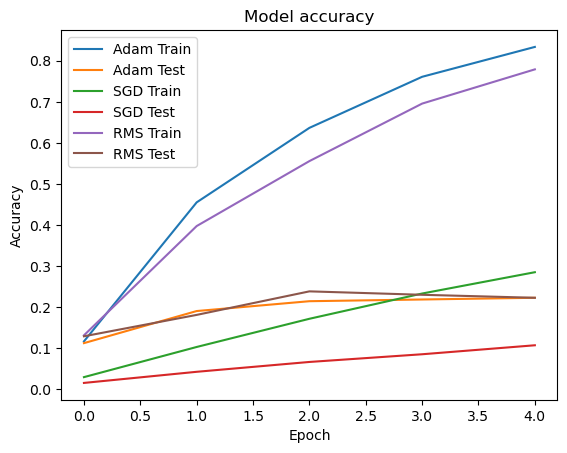

In [63]:
# Plot training & validation accuracy values
plt.plot(accuracies_adam, label = "Adam Train")
plt.plot(val_accuracies_adam, label = "Adam Test")

plt.plot(accuracies_sgd, label = "SGD Train")
plt.plot(val_accuracies_sgd, label = "SGD Test")

plt.plot(accuracies_RMS, label = "RMS Train")
plt.plot(val_accuracies_RMS, label = "RMS Test")

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [69]:
plt.savefig(r'/Users/jesus/Desktop/Projecte/XNAPproject-grup07/ouput/model_acc_631_images.png')

<Figure size 640x480 with 0 Axes>

### Loss values

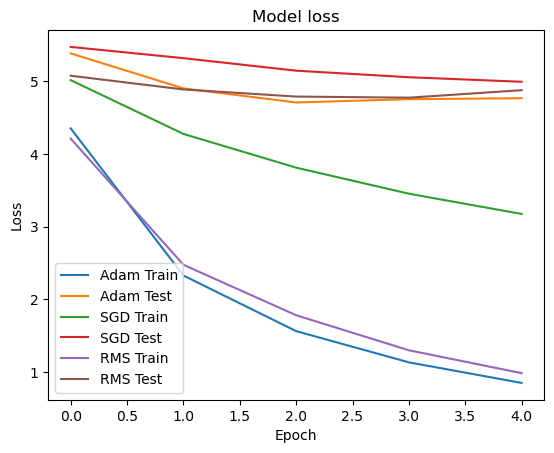

In [65]:
# Plot training & validation loss values
plt.plot(losses_adam, label = "Adam Train")
plt.plot(val_losses_adam, label = "Adam Test")

plt.plot(losses_sgd, label = "SGD Train")
plt.plot(val_losses_sgd, label = "SGD Test")

plt.plot(losses_RMS, label = "RMS Train")
plt.plot(val_losses_RMS, label = "RMS Test")

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [66]:
plt.savefig(r'/Users/jesus/Desktop/Projecte/XNAPproject-grup07/ouput/model_loss_631_images.png')

<Figure size 640x480 with 0 Axes>

# Predict the output 🔮 🎩

In [67]:
PRED_STEPS = len(test_gen) # 100 # default would have been len(test_gen)
PRED_STEPS

792

In [ ]:
def retrieve_results(predicted_class_indices, train_gens):
    print(len(predicted_class_indices),"\n",predicted_class_indices)
    print("it has values ranging from ",min(predicted_class_indices),"...to...",max(predicted_class_indices))
    labels = (train_gens[0].class_indices)
    labels = dict((v,k) for k,v in labels.items())
    predictions = [labels[k] for k in predicted_class_indices]
    print("*"*20+"\nclass_indices\n"+"*"*20+"\n",train_gens[0].class_indices,"\n")
    print("*"*20+"\nlabels\n"+"*"*20+"\n",labels,"\n")
    print("*"*20+"\npredictions has", len(predictions),"values that look like","'"+str(predictions[0])+"' which is the first prediction and corresponds to this index of the classes:",train_gens[0].class_indices[predictions[0]])
    # Save the results to a CSV file.
    filenames=test_gen.filenames[:len(predictions)] # because "ValueError: arrays must all be same length"

    real_artists = []
    for f in filenames:
        real = test_df[test_df['new_filename'] == f].artist.to_numpy()[0]
        real_artists.append(real)

    results=pd.DataFrame({"Filename":filenames,
                        "Predictions":predictions,
                        "Real Values":real_artists})
    results.to_csv("results.csv",index=False)

    return results

In [ ]:
def testing_new_images(results, training_set_artists):  
    count = 0
    match = 0
    unexpected_count = 0
    unexpected_match = 0
    match_both_expected_unexpected = 0

    for p, r in zip(results['Predictions'], results['Real Values']):
        if r in training_set_artists:
            count += 1
            if p == r:
                match += 1
        else:
            unexpected_count += 1
            if p == r:
                unexpected_match += 1

    print("test accuracy on new images for TRAINED artists")
    acc = match/count
    print(match,"/",count,"=","{:.4f}".format(acc))

    print("test accuracy on new images for UNEXPECTED artists")
    print("unexpected_match", unexpected_match)
    print("unexpected_count", unexpected_count)
    
    if unexpected_count != 0:
        u_acc = unexpected_match/unexpected_count
        print(unexpected_match,"/",unexpected_count,"=","{:.4f}".format(u_acc))

    print("test accuracy on new images")
    total_match = match+unexpected_match
    total_count = count+unexpected_count
    total_acc = (total_match)/(total_count)
    print(total_match,"/",total_count,"=","{:.4f}".format(total_acc))

## Adam

In [68]:
# Need to reset the test_gen before calling predict_generator
# This is important because forgetting to reset the test_generator results in outputs with a weird order.
test_gen.reset()
pred_adam = model_adam.predict(test_gen)

c:\Users\jesus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


792/792 ━━━━━━━━━━━━━━━━━━━━ 664s 832ms/step


In [70]:
print(len(pred_adam),"\n",pred_adam)

13455 
 [[3.00400221e-04 8.47472984e-06 4.12331519e-06 ... 4.94883687e-04
  7.38606923e-06 1.00275083e-05]
 [6.06930698e-05 2.77388608e-03 1.60919558e-02 ... 3.64669628e-04
  1.86728386e-07 1.60343276e-07]
 [3.30734765e-04 1.36672528e-02 1.23995699e-01 ... 7.37440307e-03
  7.24214544e-07 6.48476680e-06]
 ...
 [1.39962780e-04 7.03567115e-04 2.50825087e-06 ... 1.21571366e-02
  4.02204860e-05 4.88604885e-04]
 [1.04020706e-04 3.07576731e-03 2.29430116e-05 ... 8.32602564e-06
  7.12212059e-04 1.35097443e-05]
 [1.36397465e-03 1.11330432e-04 1.82187989e-06 ... 1.95028204e-02
  3.65967168e-07 6.52624522e-06]]


In [71]:
predicted_class_indices_adam = np.argmax(pred_adam,axis=1)

In [ ]:
results_adam = retrieve_results(predicted_class_indices_adam, train_gens)

In [73]:
results_adam.head()

13455 
 [ 88 102  95 ...  94  53  93]
it has values ranging from  0 ...to... 109
********************
class_indices
********************
 {'Ivan Aivazovsky': 0, 'Jan Matejko': 1, 'Gustave Dore': 2, 'Titian': 3, 'Lucas Cranach the Elder': 4, 'Utagawa Kuniyoshi': 5, 'Odilon Redon': 6, 'William Turner': 7, 'Henri de Toulouse-Lautrec': 8, 'Konstantin Somov': 9, 'Thomas Eakins': 10, 'Gustave Caillebotte': 11, 'Ferdinand Hodler': 12, 'William-Adolphe Bouguereau': 13, 'Rembrandt': 14, 'Ernst Ludwig Kirchner': 15, 'Joshua Reynolds': 16, 'William Merritt Chase': 17, 'Edgar Degas': 18, 'Claude Monet': 19, 'Theodor Severin Kittelsen': 20, 'Valentin Serov': 21, 'Felix Vallotton ': 22, 'Pierre-Auguste Renoir': 23, 'Albrecht Durer': 24, 'Francisco Goya': 25, 'Theophile Steinlen': 26, 'Katsushika Hokusai': 27, 'Tintoretto': 28, 'Orest Kiprensky': 29, 'Alfred Sisley': 30, 'Ivan Bilibin': 31, 'Berthe Morisot': 32, 'Honore Daumier': 33, 'Ivan Shishkin': 34, 'Giovanni Battista Piranesi': 35, 'Camille Cor

In [75]:
len(training_set_artists)

110

In [76]:
print(training_set_artists)

['Ivan Aivazovsky', 'Jan Matejko', 'Gustave Dore', 'Titian', 'Lucas Cranach the Elder', 'Utagawa Kuniyoshi', 'Odilon Redon', 'William Turner', 'Henri de Toulouse-Lautrec', 'Konstantin Somov', 'Thomas Eakins', 'Gustave Caillebotte', 'Ferdinand Hodler', 'William-Adolphe Bouguereau', 'Rembrandt', 'Ernst Ludwig Kirchner', 'Joshua Reynolds', 'William Merritt Chase', 'Edgar Degas', 'Claude Monet', 'Theodor Severin Kittelsen', 'Valentin Serov', 'Felix Vallotton ', 'Pierre-Auguste Renoir', 'Albrecht Durer', 'Francisco Goya', 'Theophile Steinlen', 'Katsushika Hokusai', 'Tintoretto', 'Orest Kiprensky', 'Alfred Sisley', 'Ivan Bilibin', 'Berthe Morisot', 'Honore Daumier', 'Ivan Shishkin', 'Giovanni Battista Piranesi', 'Camille Corot', 'Childe Hassam', 'Raphael Kirchner', 'James Tissot', 'Giovanni Boldini', 'Vasily Vereshchagin', 'Niko Pirosmani', 'Eugene Boudin', 'Paul Cezanne', 'John Singer Sargent', 'Peter Paul Rubens', 'Vasily Surikov', 'Vincent van Gogh', 'Georges Braque', 'Eugene Delacroix', 

In [77]:
testing_new_images(results_adam, training_set_artists)

In [78]:
testing_new_images(results_adam, training_set_artists)

test accuracy on new images for TRAINED artists
3235 / 8691 = 0.3722
test accuracy on new images for UNEXPECTED artists
unexpected_match 0
unexpected_count 4764
0 / 4764 = 0.0000
test accuracy on new images
3235 / 13455 = 0.2404


## SGD

In [79]:
test_gen.reset()
pred_sgd = model_sgd.predict(test_gen, verbose=1, steps=PRED_STEPS)
print(len(pred_sgd),"\n",pred_sgd)

792/792 ━━━━━━━━━━━━━━━━━━━━ 608s 762ms/step
13455 
 [[3.4158055e-03 4.2372002e-04 8.3117984e-04 ... 5.7625736e-04
  3.0491204e-04 1.3453953e-03]
 [2.8090603e-03 3.0659642e-03 2.6941050e-02 ... 7.8183953e-03
  3.1302249e-04 3.1462978e-03]
 [7.0853473e-04 3.7531741e-03 6.7147166e-02 ... 8.0190096e-03
  7.3514151e-05 4.0201892e-04]
 ...
 [2.3586003e-03 2.6842926e-03 7.4076949e-04 ... 7.3355399e-03
  1.6601576e-02 2.4638812e-03]
 [3.6234275e-04 1.1432306e-02 5.0917215e-04 ... 6.3525810e-04
  4.6051727e-03 2.9453381e-03]
 [8.4592188e-03 4.9797250e-03 3.7919607e-03 ... 1.4990496e-02
  5.3942753e-03 2.2837711e-03]]


In [81]:
predicted_class_indices_sgd = np.argmax(pred_sgd,axis=1)

In [82]:
results_sgd = retrieve_results(predicted_class_indices_sgd, train_gens)
results_sgd.head()

13455 
 [ 73  36  26 ...  73 103  71]
it has values ranging from  0 ...to... 109
********************
class_indices
********************
 {'Ivan Aivazovsky': 0, 'Jan Matejko': 1, 'Gustave Dore': 2, 'Titian': 3, 'Lucas Cranach the Elder': 4, 'Utagawa Kuniyoshi': 5, 'Odilon Redon': 6, 'William Turner': 7, 'Henri de Toulouse-Lautrec': 8, 'Konstantin Somov': 9, 'Thomas Eakins': 10, 'Gustave Caillebotte': 11, 'Ferdinand Hodler': 12, 'William-Adolphe Bouguereau': 13, 'Rembrandt': 14, 'Ernst Ludwig Kirchner': 15, 'Joshua Reynolds': 16, 'William Merritt Chase': 17, 'Edgar Degas': 18, 'Claude Monet': 19, 'Theodor Severin Kittelsen': 20, 'Valentin Serov': 21, 'Felix Vallotton ': 22, 'Pierre-Auguste Renoir': 23, 'Albrecht Durer': 24, 'Francisco Goya': 25, 'Theophile Steinlen': 26, 'Katsushika Hokusai': 27, 'Tintoretto': 28, 'Orest Kiprensky': 29, 'Alfred Sisley': 30, 'Ivan Bilibin': 31, 'Berthe Morisot': 32, 'Honore Daumier': 33, 'Ivan Shishkin': 34, 'Giovanni Battista Piranesi': 35, 'Camille Cor

,Filename,Predictions,Real Values
0,85864.jpg,Ilya Repin,Mark Rothko
1,75956.jpg,Camille Corot,Jan Matejko
2,31977.jpg,Theophile Steinlen,Gustave Dore
3,2984.jpg,Raphael Kirchner,Jean Fouquet
4,15715.jpg,Ilya Repin,Titian


In [83]:
print(len(training_set_artists))
print(training_set_artists)

110
['Ivan Aivazovsky', 'Jan Matejko', 'Gustave Dore', 'Titian', 'Lucas Cranach the Elder', 'Utagawa Kuniyoshi', 'Odilon Redon', 'William Turner', 'Henri de Toulouse-Lautrec', 'Konstantin Somov', 'Thomas Eakins', 'Gustave Caillebotte', 'Ferdinand Hodler', 'William-Adolphe Bouguereau', 'Rembrandt', 'Ernst Ludwig Kirchner', 'Joshua Reynolds', 'William Merritt Chase', 'Edgar Degas', 'Claude Monet', 'Theodor Severin Kittelsen', 'Valentin Serov', 'Felix Vallotton ', 'Pierre-Auguste Renoir', 'Albrecht Durer', 'Francisco Goya', 'Theophile Steinlen', 'Katsushika Hokusai', 'Tintoretto', 'Orest Kiprensky', 'Alfred Sisley', 'Ivan Bilibin', 'Berthe Morisot', 'Honore Daumier', 'Ivan Shishkin', 'Giovanni Battista Piranesi', 'Camille Corot', 'Childe Hassam', 'Raphael Kirchner', 'James Tissot', 'Giovanni Boldini', 'Vasily Vereshchagin', 'Niko Pirosmani', 'Eugene Boudin', 'Paul Cezanne', 'John Singer Sargent', 'Peter Paul Rubens', 'Vasily Surikov', 'Vincent van Gogh', 'Georges Braque', 'Eugene Delacroi

In [84]:
testing_new_images(results_sgd, training_set_artists)

test accuracy on new images for TRAINED artists
1683 / 8691 = 0.1936
test accuracy on new images for UNEXPECTED artists
unexpected_match 0
unexpected_count 4764
0 / 4764 = 0.0000
test accuracy on new images
1683 / 13455 = 0.1251


## RMSprop

In [85]:
test_gen.reset()
pred_RMS = model_RMS.predict(test_gen, verbose=1, steps=PRED_STEPS)
print(len(pred_RMS),"\n",pred_RMS)

792/792 ━━━━━━━━━━━━━━━━━━━━ 592s 744ms/step
13455 
 [[8.8815919e-05 3.3820834e-06 4.2455840e-06 ... 1.3187146e-04
  1.2272742e-05 1.2095777e-05]
 [2.9881081e-05 1.8028265e-03 1.6021436e-02 ... 2.4067289e-04
  6.2021797e-08 7.7588872e-08]
 [7.3561976e-05 2.5773359e-02 6.1068878e-02 ... 9.4120356e-04
  7.3249225e-08 7.9875588e-07]
 ...
 [1.0414920e-04 1.6599047e-03 3.7789508e-07 ... 1.8573694e-03
  5.9998831e-05 1.0412238e-04]
 [7.9395822e-06 1.3765954e-02 1.4429031e-05 ... 2.5405682e-06
  5.9347646e-04 5.0146700e-05]
 [7.9391291e-04 2.0894859e-04 1.0949428e-05 ... 9.6393861e-03
  6.3254610e-08 1.2141197e-05]]


In [86]:
predicted_class_indices_RMS = np.argmax(pred_RMS,axis=1)

In [87]:
results_RMS = retrieve_results(predicted_class_indices_RMS, train_gens)
results_RMS.head()

13455 
 [ 88 102  26 ...  94  53  85]
it has values ranging from  0 ...to... 109
********************
class_indices
********************
 {'Ivan Aivazovsky': 0, 'Jan Matejko': 1, 'Gustave Dore': 2, 'Titian': 3, 'Lucas Cranach the Elder': 4, 'Utagawa Kuniyoshi': 5, 'Odilon Redon': 6, 'William Turner': 7, 'Henri de Toulouse-Lautrec': 8, 'Konstantin Somov': 9, 'Thomas Eakins': 10, 'Gustave Caillebotte': 11, 'Ferdinand Hodler': 12, 'William-Adolphe Bouguereau': 13, 'Rembrandt': 14, 'Ernst Ludwig Kirchner': 15, 'Joshua Reynolds': 16, 'William Merritt Chase': 17, 'Edgar Degas': 18, 'Claude Monet': 19, 'Theodor Severin Kittelsen': 20, 'Valentin Serov': 21, 'Felix Vallotton ': 22, 'Pierre-Auguste Renoir': 23, 'Albrecht Durer': 24, 'Francisco Goya': 25, 'Theophile Steinlen': 26, 'Katsushika Hokusai': 27, 'Tintoretto': 28, 'Orest Kiprensky': 29, 'Alfred Sisley': 30, 'Ivan Bilibin': 31, 'Berthe Morisot': 32, 'Honore Daumier': 33, 'Ivan Shishkin': 34, 'Giovanni Battista Piranesi': 35, 'Camille Cor

,Filename,Predictions,Real Values
0,85864.jpg,Rene Magritte,Mark Rothko
1,75956.jpg,Konstantin Korovin,Jan Matejko
2,31977.jpg,Theophile Steinlen,Gustave Dore
3,2984.jpg,Zinaida Serebriakova,Jean Fouquet
4,15715.jpg,Titian,Titian


In [88]:
print(len(training_set_artists))
print(training_set_artists)

110
['Ivan Aivazovsky', 'Jan Matejko', 'Gustave Dore', 'Titian', 'Lucas Cranach the Elder', 'Utagawa Kuniyoshi', 'Odilon Redon', 'William Turner', 'Henri de Toulouse-Lautrec', 'Konstantin Somov', 'Thomas Eakins', 'Gustave Caillebotte', 'Ferdinand Hodler', 'William-Adolphe Bouguereau', 'Rembrandt', 'Ernst Ludwig Kirchner', 'Joshua Reynolds', 'William Merritt Chase', 'Edgar Degas', 'Claude Monet', 'Theodor Severin Kittelsen', 'Valentin Serov', 'Felix Vallotton ', 'Pierre-Auguste Renoir', 'Albrecht Durer', 'Francisco Goya', 'Theophile Steinlen', 'Katsushika Hokusai', 'Tintoretto', 'Orest Kiprensky', 'Alfred Sisley', 'Ivan Bilibin', 'Berthe Morisot', 'Honore Daumier', 'Ivan Shishkin', 'Giovanni Battista Piranesi', 'Camille Corot', 'Childe Hassam', 'Raphael Kirchner', 'James Tissot', 'Giovanni Boldini', 'Vasily Vereshchagin', 'Niko Pirosmani', 'Eugene Boudin', 'Paul Cezanne', 'John Singer Sargent', 'Peter Paul Rubens', 'Vasily Surikov', 'Vincent van Gogh', 'Georges Braque', 'Eugene Delacroi

In [89]:
testing_new_images(results_RMS, training_set_artists)

test accuracy on new images for TRAINED artists
3171 / 8691 = 0.3649
test accuracy on new images for UNEXPECTED artists
unexpected_match 0
unexpected_count 4764
0 / 4764 = 0.0000
test accuracy on new images
3171 / 13455 = 0.2357


# Ideas
- Having a the prediction dataset: Filename, Predictions, Real Values. We can construct a composition of the predictions.
- We can now predict artist and another caracteristic (like stryle).

## Mosaics

In [91]:
def calculate_position(current_index, total_images_per_row, image_width, image_height, margin):
    row = current_index // total_images_per_row
    col = current_index % total_images_per_row
    x = col * (image_width + margin)
    y = row * (image_height + margin)
    return (x, y)


In [94]:
# Load the dataset
import pandas as pd
from PIL import Image, ImageDraw, ImageFont

# Group by predicted artist
grouped_data = results_adam.groupby('Predictions') # tmb podria ser Real Values

# Parameters for composition layout
total_images_per_row = 5
image_width = 200
image_height = 200
margin = 10

# Create compositions
# Create compositions
for predicted_artist, group in grouped_data:
    # Create a new blank image to compose the group of images
    composition_width = total_images_per_row * (image_width + margin) - margin
    num_images = len(group)
    num_rows = (num_images + total_images_per_row - 1) // total_images_per_row
    title_height = 30  # Height reserved for the title
    composition_height = num_rows * (image_height + margin) - margin + title_height
    composition = Image.new('RGB', (composition_width, composition_height), color='white')

    # Add the title
    draw = ImageDraw.Draw(composition)
    font = ImageFont.truetype("arial.ttf", 20)
    title = "Predicted Artist: {}".format(predicted_artist)
    title_width = draw.textlength(title, font=font)
    draw.text(((composition_width - title_width) // 2, 0), title, fill="black", font=font)

    # Loop through images in the group
    for i, (_, row) in enumerate(group.iterrows()):
        # Open the image file
        image = Image.open(TEST_DIR + "\\" + row['Filename'])
        
        # Resize image if needed
        image = image.resize((image_width, image_height))
        
        # Calculate position to paste this image in the composition
        position = calculate_position(i, total_images_per_row, image_width, image_height, margin)
        position = (position[0], position[1] + title_height)  # Adjust position for title
        
        # Paste the image onto the composition
        composition.paste(image, position)
    
    # Display or save the composition
    composition.save('/home/xnmaster/Pictures/Predictions_3models/composition_{}.png'.format(predicted_artist))


### Real values

In [ ]:
grouped_data = results_adam.groupby('Predictions') # tmb podria ser Real Values

In [ ]:
grouped_data

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont

# Group by predicted artist
filtered_data = results_adam[results_adam['Real Values'].isin(training_set_artists)]
grouped_data = filtered_data.groupby('Real Values')# tmb podria ser Real Values

# Parameters for composition layout
total_images_per_row = 5
image_width = 200
image_height = 200
margin = 10
max_rows = 21  # Maximum number of rows to display

# Create compositions
for predicted_artist, group in grouped_data:
    # Limit the number of images to max_rows * total_images_per_row
    num_images = min(len(group), max_rows * total_images_per_row)
    
    # Create a new blank image to compose the group of images
    composition_width = total_images_per_row * (image_width + margin) - margin
    num_rows = (num_images + total_images_per_row - 1) // total_images_per_row
    title_height = 30  # Height reserved for the title
    composition_height = num_rows * (image_height + margin) - margin + title_height
    composition = Image.new('RGB', (composition_width, composition_height), color='white')

    # Add the title
    draw = ImageDraw.Draw(composition)
    font = ImageFont.load_default()
    title = "Predicted Artist: {}".format(predicted_artist)
    title_width = draw.textlength(title, font=font)
    draw.text(((composition_width - title_width) // 2, 0), title, fill="black", font=font)

    # Loop through images in the group
    for i, (_, row) in enumerate(group.iterrows()):
        if i >= num_images:
            break
        # Open the image file
        image = Image.open(TEST_DIR + "/" + row['Filename'])
        
        # Resize image if needed
        image = image.resize((image_width, image_height))
        
        # Calculate position to paste this image in the composition
        position = calculate_position(i, total_images_per_row, image_width, image_height, margin)
        position = (position[0], position[1] + title_height)  # Adjust position for title
        
        # Paste the image onto the composition
        composition.paste(image, position)
    
    # Display or save the composition
    # composition.save(r'C:\Users\Mercè\Documents\UAB\XN\Projecte\XNAPproject-grup07\compostions\predictions_631_images\composition_{}.png'.format(predicted_artist))
    composition.save('/home/xnmaster/Pictures/Predictions_3models/composition_{}.png'.format(predicted_artist))
